# Learning and Validation Curves

In [8]:
%matplotlib inline
import numpy as np
from sklearn.learning_curve import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
np.random.seed(0)
digits = load_digits()
X, y = digits.data, digits.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_range = np.logspace(-6,-1,5)
kf = KFold(y.shape[0], n_folds=10)

train_scores, valid_scores = validation_curve(SVC(), X, y, param_name="gamma", 
                                              param_range=param_range, cv = kf, scoring="accuracy")

In [31]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

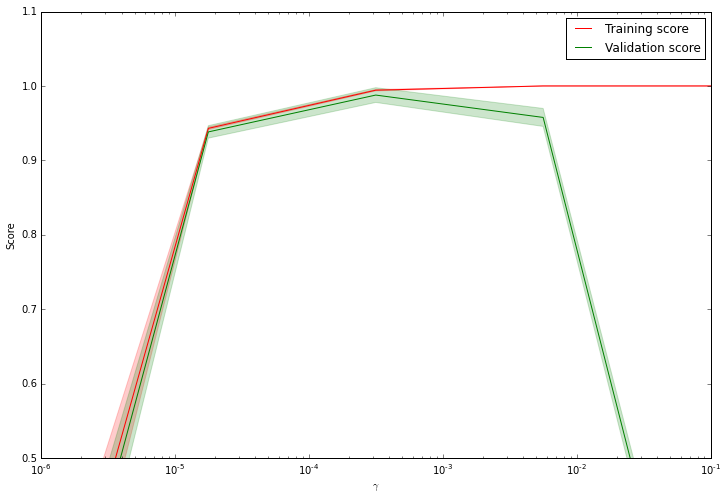

In [32]:
plt.figure(figsize=(12,8))
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim([0.5, 1.1])
plt.semilogx(param_range, np.mean(train_scores, axis=1), label = "Training score", color="r")
plt.fill_between(param_range, train_scores_mean + train_scores_std, 
                train_scores_mean - train_scores_std, color = "r", alpha=0.2)
plt.semilogx(param_range, np.mean(valid_scores, axis = 1), label = "Validation score", color="g")
plt.fill_between(param_range, valid_scores_mean + valid_scores_std, 
                valid_scores_mean - valid_scores_std, color = "g", alpha=0.2)

plt.legend(loc="best")
plt.show()

How to reduce **High Bias**?
1. Add more features
2. Use a more sophisticated model
3. Use fewer examples
4. Decrease regularization

How to reduce **High variance**?
1. Use fewer features
2. Use more training samples
3. Increase regularization

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [60]:
def plot_learning_curve(estimator, title, X, y, scoring, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")

    return plt

In [43]:
digits = load_digits()
X, y = digits.data, digits.target

titles = ["Naive Bayes", "SVM, RBF kernel, $\gamma=0.001$",
          "Decision Tree", "Decision Tree (max_depth = 3)",
          "Perceptron without regularization", "Perceptron (regularization)"]

estimators = [GaussianNB(), SVC(gamma=0.001),
              DecisionTreeClassifier(), DecisionTreeClassifier(max_depth=3),
              Perceptron(), Perceptron(alpha=1)]

scorings = ["precision", "recall"]

cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)

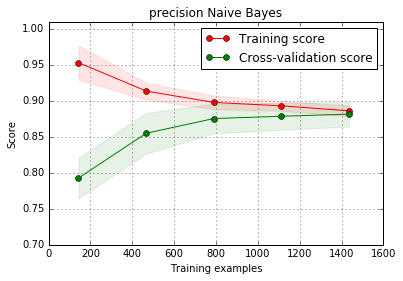

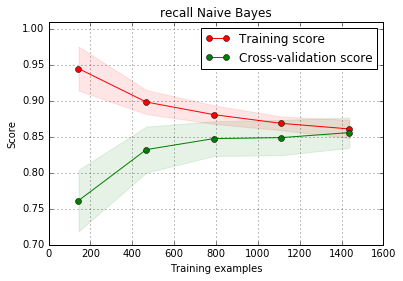

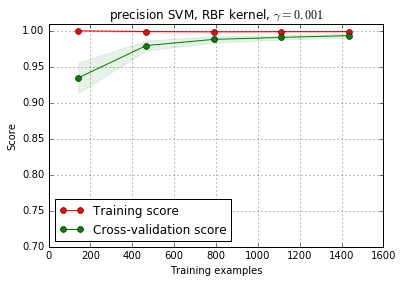

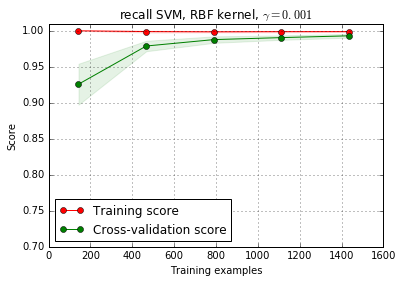

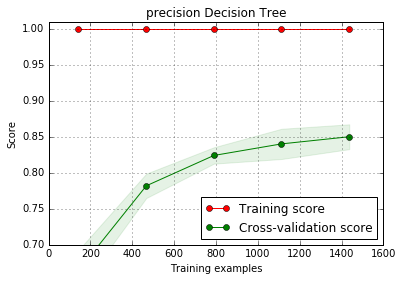

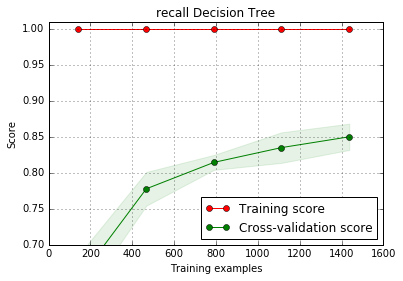

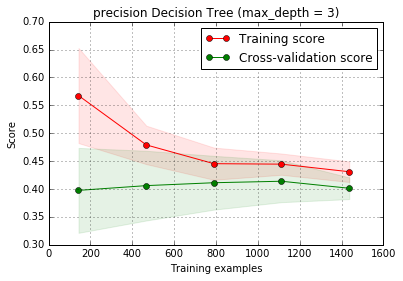

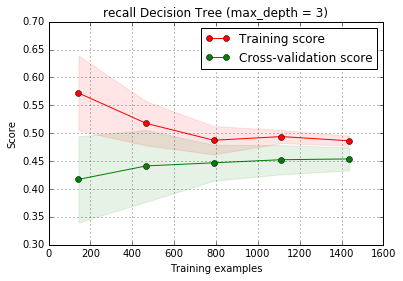

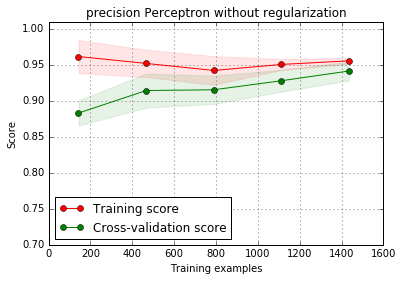

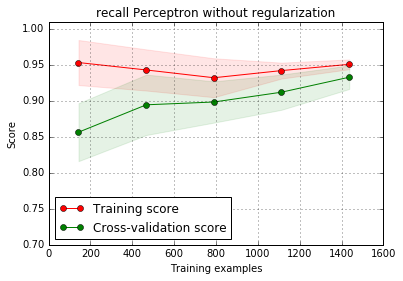

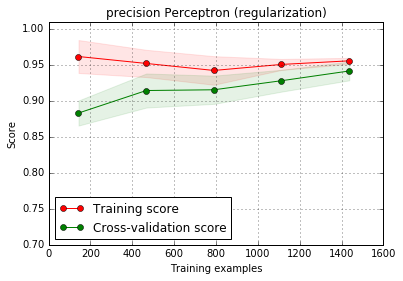

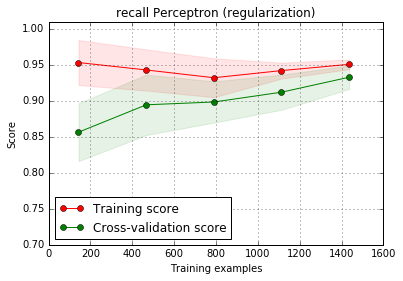

In [44]:
for estimator, title in zip(estimators, titles):
    for scoring in scorings:
        if "depth" not in title:
            plot_learning_curve(estimator, scoring + " " + title, X, y, scoring,
                                (0.7, 1.01), cv=cv, n_jobs=4)
        else:
            plot_learning_curve(estimator, scoring + " " + title, X, y, scoring,
                                (0.3, 0.7), cv=cv, n_jobs=4)

plt.show()

### Naïve Bayes and cost-sensivity

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

In [62]:
categories = ['sci.electronics', 'sci.space']

newsgroups = fetch_20newsgroups(subset='all', categories=categories)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

titles = ["Naive Bayes (no prior)", "Naive Bayes (prior: 0.9)",
          "Naive Bayes (prior: 0.99)", "Naive Bayes (prior: 0.999)"]

estimators = [MultinomialNB(), MultinomialNB(class_prior=[0.1, 0.9]),
              MultinomialNB(class_prior = [0.01, 0.99]), MultinomialNB(class_prior = [0.001, 0.999])]

scorings = ["accuracy", "precision", "recall"]

cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)

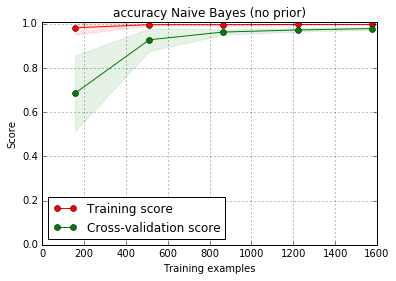

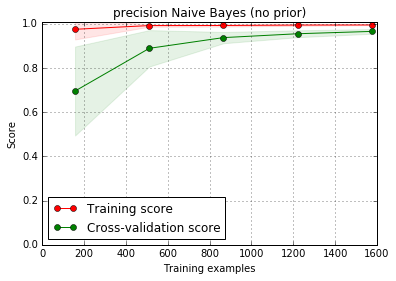

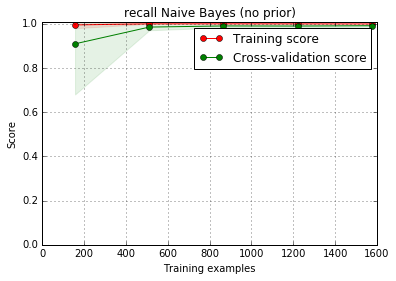

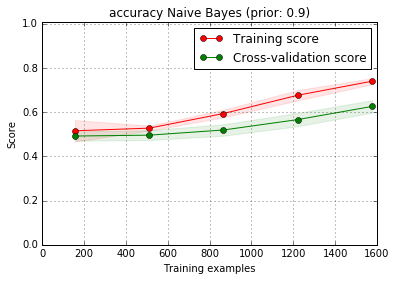

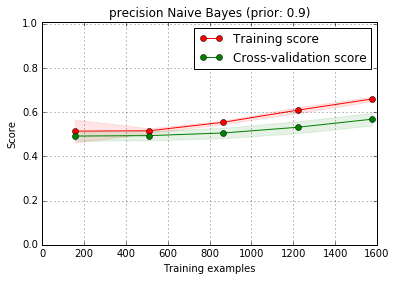

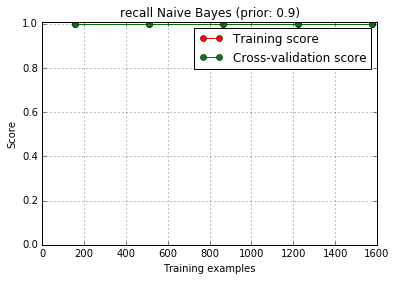

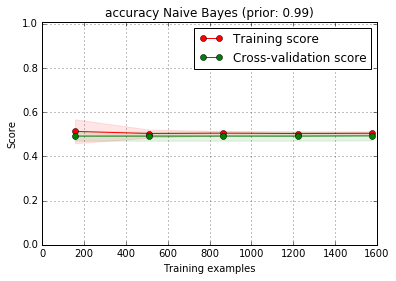

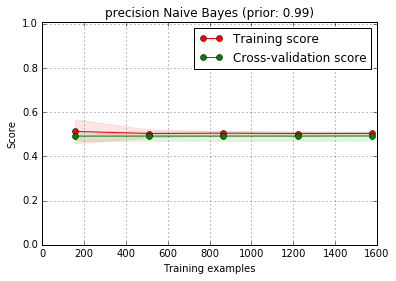

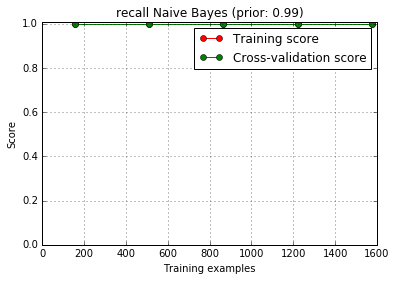

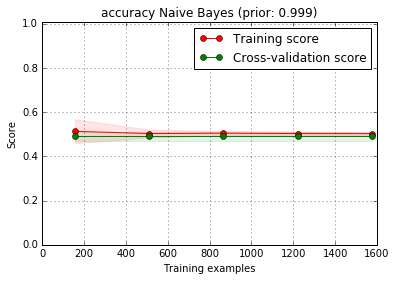

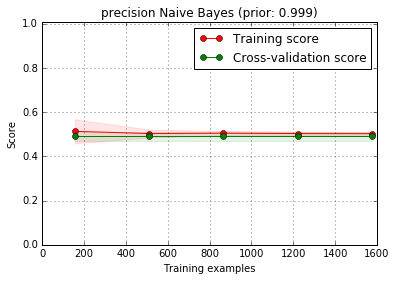

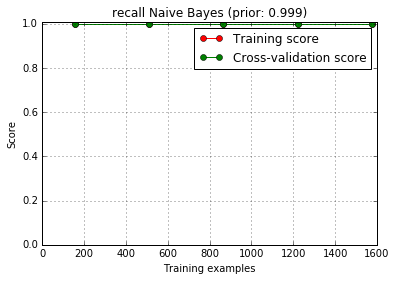

In [63]:
for estimator, title in zip(estimators, titles):
    for scoring in scorings:
        plot_learning_curve(estimator, scoring + " " + title, X, y, scoring,
                                (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()